<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-dataset-&amp;-librairies" data-toc-modified-id="Loading-dataset-&amp;-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading dataset &amp; librairies</a></span></li><li><span><a href="#Subgrouping" data-toc-modified-id="Subgrouping-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Subgrouping</a></span><ul class="toc-item"><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature selection</a></span></li><li><span><a href="#Z-scoring" data-toc-modified-id="Z-scoring-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Z-scoring</a></span></li></ul></li><li><span><a href="#Interaction-Analyses" data-toc-modified-id="Interaction-Analyses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interaction Analyses</a></span><ul class="toc-item"><li><span><a href="#CCA-x-APOE-in-predicting-AD-family-history" data-toc-modified-id="CCA-x-APOE-in-predicting-AD-family-history-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CCA x APOE in predicting AD family history</a></span><ul class="toc-item"><li><span><a href="#Controlling-for-age" data-toc-modified-id="Controlling-for-age-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Controlling for age</a></span></li><li><span><a href="#Permutation-Analyses" data-toc-modified-id="Permutation-Analyses-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Permutation Analyses</a></span></li></ul></li><li><span><a href="#CCA-x-APOE-in-predicting-Risks" data-toc-modified-id="CCA-x-APOE-in-predicting-Risks-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CCA x APOE in predicting Risks</a></span><ul class="toc-item"><li><span><a href="#Controlling-for-age" data-toc-modified-id="Controlling-for-age-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Controlling for age</a></span></li><li><span><a href="#Subgroup-Analyses" data-toc-modified-id="Subgroup-Analyses-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Subgroup Analyses</a></span></li><li><span><a href="#Permutation-Analyses" data-toc-modified-id="Permutation-Analyses-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Permutation Analyses</a></span><ul class="toc-item"><li><span><a href="#Males" data-toc-modified-id="Males-3.2.3.1"><span class="toc-item-num">3.2.3.1&nbsp;&nbsp;</span>Males</a></span></li><li><span><a href="#Females" data-toc-modified-id="Females-3.2.3.2"><span class="toc-item-num">3.2.3.2&nbsp;&nbsp;</span>Females</a></span></li><li><span><a href="#Generating-masked-dataframes-and-plots" data-toc-modified-id="Generating-masked-dataframes-and-plots-3.2.3.3"><span class="toc-item-num">3.2.3.3&nbsp;&nbsp;</span>Generating masked dataframes and plots</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Loading dataset & librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os
import sys
import json
from scipy.cluster.hierarchy import dendrogram
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge 
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('HCDMNCOV_AD.csv')
data.head()

,eid,father,mother,sibling,mf,mfs,Fluid intelligence score (R),Loneliness,Lack of social support,Age,...,25741-2.0,25742-2.0,25006-2.0,21001-0.0,25756-2.0,25757-2.0,25758-2.0,25759-2.0,54-2.0,eid.1
0,1000124,0.0,0.0,0.0,0.0,0.0,6.71,0.0,1.0,44.0,...,0.138021,0.166914,663615.0,24.0980,-2.460460,62.0,17.01160,-1097.0,11025.0,1000124
1,1000181,0.0,0.0,0.0,0.0,0.0,6.71,0.0,1.0,57.0,...,0.140451,0.144204,609556.0,25.2792,-1.966260,59.0,-29.19310,-1042.0,11025.0,1000181
2,1000231,0.0,0.0,0.0,0.0,0.0,6.71,1.0,0.0,43.0,...,0.127892,NaN,611251.0,25.3462,1.900050,74.0,-24.32430,-1042.0,11027.0,1000231
3,1000247,0.0,0.0,0.0,0.0,0.0,8.00,0.0,0.0,61.0,...,0.246526,NaN,591077.0,31.1147,-0.266935,65.0,4.42269,-1085.0,11025.0,1000247
4,1000250,0.0,0.0,0.0,0.0,0.0,6.71,0.0,0.0,63.0,...,0.084830,NaN,546671.0,22.8772,-0.599555,61.0,34.99320,-1113.0,11025.0,1000250


In [3]:
data.loc[data['Allele-1'] == 'APOE1', 'Allele-2']= 'APOE4'
data.loc[data['Allele-1'] == 'APOE1', 'Allele-1']= 'APOE2'

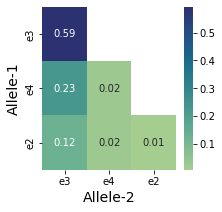

In [4]:
cm = confusion_matrix(data['Allele-1'], data['Allele-2'], labels = data['Allele-1'].unique(), sample_weight=None, normalize=None)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = data['Allele-1'].unique())
# disp.plot(values_format = '.7g', cmap='Blues')
# plt.savefig('confusin_matrix.png', dpi=200, bbox_inches='tight')
# Normalise
cmn = cm.astype('float') / len(data)
mask = (cmn==0)
mask
# #mask[np.triu_indices_from(mask)] = True
#sns.cubehelix_palette(as_cmap=True)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cmn,mask=mask,cmap= 'crest', annot=True, fmt='.2f')
ax.set_yticklabels(['e3','e4','e2'])
ax.set_xticklabels(['e3','e4','e2'])
ax.set_ylabel('Allele-1', size= 14)
ax.set_xlabel('Allele-2', size=14)
plt.savefig('heatmap.png',dpi=200,bbox_inches='tight')

# Subgrouping 

In [5]:
#sex
id_m = np.where((data['Sex']==1))
id_f = np.where((data['Sex']==0))
#age
id_young = np.where(data['Age']<=55.0)
id_old = np.where(data['Age']>55.0)
#sex x age 
id_young_m = np.where((data['Age']<=55.0)&(data['Sex']==1))
id_young_f = np.where((data['Age']<=55.0)&(data['Sex']==0))
id_old_m = np.where((data['Age']>55.0)&(data['Sex']==1))
id_old_f = np.where((data['Age']>55.0)&(data['Sex']==0))
#education
id_low_ed = np.where(data['Education score']<=6.69)
id_high_ed = np.where(data['Education score']>6.69)
#all 
id_all = np.where(data['eid']!= None)

## Feature selection

In [6]:
def features (id):
    features = data.iloc[id]
    AD = features['mf']
    features_apoe = features[['e2/e2', 'e2/e3','e3/e3','e1/e3','e3/e4','e4/e4']]
    cca_modes = features[['1',
         '2',
         '3',
         '4',
         '5',
         '6',
         '7',
         '8',
         '9',
         '10',
         '11',
         '12',
         '13',
         '14',
         '15',
         '16',
         '17',
         '18',
         '19',
         '20',
         '21',
         '22',
         '23',
         '24',
         '25',
         '26',
         '27',
         '28',
         '29',
         '30',
         '31',
         '32',
         '33',
         '34',
         '35',
         '36',
         '37',
         '38',
         '39',
         '40',
         '41',
         '42',
         '43',
         '44',
         '45',
         '46',
         '47',
         '48',
         '49',
         '50']]
    risks = features[['Fluid intelligence score (R)',
              'Loneliness',
              'Lack of social support',
              'Age',
              'Sex',
              'Education score',
              'Age completed high school education',
              'Alcohol intake frequency',
              'Alcohol consumption on a typical drinking day',
              'Current tobacco smoking frequency',
              'Past tobacco smoking frequency',
              'Attend sports club or gym',
              'Attend pub or social club',
              'Attend religious group',
              'Attend adult education class',
              'Walking for pleasure',
              'Moderate exercises',
              'Strenuous sports',
              'Sleep duration',
              'Getting up in the morning',
              'Being a morning person',
              'Sleeplessness or insomnia',
              'Heart attack',
              'Angina',
              'Stroke',
              'Hypertension',
              'Diabetes diagnosed by a doctor',
              'Hearing difficulty with background noise',
              'Hearing aid user',
              'Glaucoma',
              'Cataract',
              'Macular degeneration',
              'Miserableness',
              'Fed-up feelings',
              'Mood swings',
              'Worrier / anxious feelings',
              'Nervous feelings',
              'Sensitivity / hurt feelings',
              "Tense / 'highly strung'",
              "Suffer from 'nerves'",
              'Worry too long after embarrassment',
              'Irritability',
              'Neuroticism score',
              'Happiness',
              'Feelings of nervousness or anxiety',
              'Frequency of friend / family visits',
              'Friendships satisfaction',
              'Family relationship satisfaction',
              'Number of full siblings',
              'Living in urban areas',
              'Average household income',
              'Paid employment',
              'Retirement',
              'Looking after home or family',
              'Unable to work due to sickness or disability',
              'Unemployment',
              'Doing unpaid or voluntary work',
              'Full or part-time student',
              'Number of vehicles in household',
              'Time spent watching TV',
              'Time spent using computer',
              'Number in household',
              'Physical environment score']]
    
    risks = risks.rename(columns={'Worrier / anxious feelings': 'Worrier_anxious',
                           'Fluid intelligence score (R)': 'Fluid intelligence score',
                           'Sensitivity / hurt feelings': 'Sensitivity_Hurt feelings',
                            "Tense / 'highly strung'":'Tense_Highly strung',
                           'Frequency of friend / family visits': 'Frequency of friend or family visits'})
    APOE_scores = data['APOE_ranked']
    
    return AD, features_apoe, cca_modes, risks, APOE_scores

## Z-scoring

In [7]:
#generating features for all participants
AD, features_apoe, all_modes, risks, APOE_scores = features(id_all)

In [8]:
scaler = StandardScaler()
all_modes_zscored = scaler.fit_transform(all_modes)
all_modes_zscored2 = pd.DataFrame(all_modes_zscored, columns=range(1,51))

In [9]:
scaler = StandardScaler()
risks_z_scored = scaler.fit_transform(risks)
risks_z_scored2 = pd.DataFrame(risks_z_scored, columns=risks.columns)

# Interaction Analyses

## CCA x APOE in predicting AD family history

### Controlling for age

In [10]:
def interaction_cov_age (features, id_x, tag):
    ad = np.array(features[0])
    #shuffling AD outcome
    #uncomment line below to perform permuation analyses
#     np.random.shuffle(ad)
    #print(f'AD: {ad.shape}')
    apoe = np.array(features[1])
    #print(f'APOE: {apoe.shape}')
    #getting age from risk factors z-scored on whole participant cohort
    age = risks_z_scored2.iloc[id_x]['Age'].to_numpy()
    #getting CCA data from z-scored on whole participant cohort
    cca_modes = all_modes_zscored2.iloc[id_x].to_numpy()
    
    log_model = LogisticRegression()
    table = pd.DataFrame()
    index = [] 

    for i in range(0, len(cca_modes.T)):
        #ading genotypes
        data = np.append(apoe.T,[cca_modes[:,i]], axis=0)
        #print(data.T.shape)
        for j in range(0,len(apoe.T)): 
            interaction = cca_modes[:,i]*apoe[:,j]
            interaction = interaction.reshape(1,-1)
            data = np.append(data, interaction, axis=0)
        data = np.append(data, [age], axis=0)
        #print(f'HC + APOE + interactions: {data.shape}')
        log_model.fit(data.T,ad)
        coef = pd.DataFrame(log_model.coef_, columns = ['Main effect e2/2',
                                                        'Main effect e2/3',
                                                        'Main effect e3/3',
                                                        'Main effect e2/4',
                                                        'Main effect e3/4',
                                                        'Main effect e4/4',
                                                        'Main effect canonical variate',
                                                        'Canonical variate x e2/2',
                                                        'Canonical variate x e2/3',
                                                        'Canonical variate x e3/3',
                                                        'Canonical variate x e2/4',
                                                        'Canonical variate x e3/4',
                                                        'Canonical variate x e4/4',
                                                        'Age'])
        index = index + [f'Component: {i+1}']
        table = table.append(coef)
        table['id']= index
        table = table.set_index(['id'],drop=True)
        
#     %matplotlib inline    
#     plt.figure(figsize=(7, 5))
#     sns.heatmap(table.T.iloc[:,0:25], cmap=plt.cm.RdBu_r, center=0, vmin=-1, vmax=1, xticklabels = range(1,26))
#     plt.title(f'Interactions of hippocampus canonical variates with APOE \n genotypes in predicting AD family history in {tag}')
#     plot1_path = os.path.abspath(f'/Users/chloesavignac/_CCA_plots/november/cov_HC_cca_apoe_AD_{tag}.png')
#     #plt.tight_layout()
#     #plt.subplots_adjust(top=1)
#     #plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
#     #plt.show()

#     plt.figure(figsize=(7, 5))
#     sns.heatmap(table.T.iloc[:,25:51], cmap=plt.cm.RdBu_r, center=0, vmin=-1, vmax=1, xticklabels = range(1,26))
#     plt.title(f'Interactions of DMN canonical variates with APOE genotypes \n in predicting AD family history in {tag}')
#     plot1_path = os.path.abspath(f'/Users/chloesavignac/_CCA_plots/november/cov_DMN_cca_apoe_AD_{tag}.png')
#     #plt.tight_layout()
#     #plt.subplots_adjust(top=1)
#     #plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
#     #plt.show()
        
    return table

### Permutation Analyses

In [11]:
real_coefs_m = interaction_cov_age(features(id_m), id_m, 'males')
real_coefs_f = interaction_cov_age(features(id_f), id_f, 'females')

In [ ]:
#MALES
#SHUFFLING TEST 
tables_m = pd.DataFrame()
for i in range(0,1000):
    np.random.seed(i)
    table = interaction_cov_age(features(id_m), id_m, 'males')
    tables_m = tables_m.append(table)
tables_m.to_csv('coefs_males_07.26.22.csv')

#computing p-values
dict_pval_m = {}
for i in range(0,len(tables_m.columns)):
    for j in range(0,50):
        point = real_coefs_m.iloc[j,i]
        print(f'Real coefficient for {tables_m.columns[i]}: {point}')
        null_dist = tables_m.iloc[::50+j, i]
        plt.hist(null_dist, bins=20)
        plt.title(f'mode {j+1}: {tables_m.columns[i]}')
        plt.show()  
        if point < 0: 
            bigger = null_dist[null_dist<point]
            print(f'Number of values above criterion: {bigger.shape[0]}')
            p_val = bigger.shape[0]/1000
            print(f'P-value: {p_val}')
        else: 
            bigger = null_dist[null_dist>point]
            print(f'Number of values above criterion: {bigger.shape[0]}')
            p_val = bigger.shape[0]/1000
            print(f'P-value: {p_val}')
        key = f'Mode{j+1}_{tables_m.columns[i]}'
        dict_pval_m[key] = p_val
#saving results       
p_val_m = pd.DataFrame()
coefs = []
pval = []
for i in dict_pval_m.items():
    coefs = np.append(coefs,i[0])
    pval = np.append(pval,i[1])
p_val_m['coefs'] = coefs
p_val_m['pval'] = pval
p_val_m.to_csv('coefs_pval_males_07.26.22.csv')

In [ ]:
#FEMALES
#SHUFFLING TEST
tables_f = pd.DataFrame()
for i in range(0,1000):
    np.random.seed(i)
    table = interaction_cov_age(features(id_f), id_f, 'females')
    tables_f = tables_f.append(table)
tables_f.to_csv('coefs_females_07.26.22.csv')

#computing p-values
dict_pval_f = {}
for i in range(0,len(tables_f.columns)):
    for j in range(0,50):
        point = real_coefs_f.iloc[j,i]
        print(f'Real coefficient for {tables_f.columns[i]}: {point}')
        null_dist = tables_f.iloc[::50+j, i]
        plt.hist(null_dist, bins=20)
        plt.title(f'mode {j+1}: {tables_f.columns[i]}')
        plt.show()  
        if point < 0: 
            bigger = null_dist[null_dist<point]
            print(f'Number of values above criterion: {bigger.shape[0]}')
            p_val = bigger.shape[0]/1000
            print(f'P-value: {p_val}')
        else: 
            bigger = null_dist[null_dist>point]
            print(f'Number of values above criterion: {bigger.shape[0]}')
            p_val = bigger.shape[0]/1000
            print(f'P-value: {p_val}')
        key = f'Mode{j+1}_{tables_f.columns[i]}'
        dict_pval_f[key] = p_val
#saving results              
p_val_f = pd.DataFrame()
coefs = []
pval = []
for i in dict_pval_f.items():
    coefs = np.append(coefs,i[0])
    pval = np.append(pval,i[1])
p_val_f['coefs'] = coefs
p_val_f['pval'] = pval
p_val_f.to_csv('coefs_pval_females_07.26.22.csv')

In [ ]:
def arrange_pvals(p):
    pvals = pd.DataFrame()
    for i in range(0,700,50):
        coef = p[i:i+50]
        pval = coef['pval'].values
        coef_name = coef['coefs'].values[0]
        pvals[coef_name]=pval
        
    pvals = pvals.rename(columns={
    "Mode1_Main effect e2/2": "Main effect e2/2", 
    "Mode1_Main effect e2/3": "Main effect e2/3", 
    "Mode1_Main effect e3/3": "Main effect e3/3",
    "Mode1_Main effect e2/4": "Main effect e2/4",
    "Mode1_Main effect e3/4": "Main effect e3/4",
    "Mode1_Main effect e4/4": "Main effect e4/4",
    "Mode1_Main effect canonical variate": "Main effect canonical variate",
    "Mode1_Canonical variate x e2/2": "Canonical variate x e2/2",
    "Mode1_Canonical variate x e2/3": "Canonical variate x e2/3",
    "Mode1_Canonical variate x e3/3": "Canonical variate x e3/3",
    "Mode1_Canonical variate x e2/4": "Canonical variate x e2/4",
    "Mode1_Canonical variate x e3/4": "Canonical variate x e3/4",
    "Mode1_Canonical variate x e4/4": "Canonical variate x e4/4",
    "Mode1_Age": "Age", })
    
    return pvals

In [ ]:
pval_f = pd.read_csv('coefs_pval_females_07.26.22.csv',index_col =0)
pval_f = arrange_pvals(pval_f)
pval_f.to_csv('pvals_females_fig_6.csv')

In [ ]:
pval_m = pd.read_csv('coefs_pval_males_07.26.22.csv',index_col =0)
pval_m = arrange_pvals(pval_m)
pval_m.to_csv('pvals_males_fig_6.csv')

In [ ]:
real_coefs_m = real_coefs_m.reset_index(drop=True)
real_coefs_f = real_coefs_f.reset_index(drop=True)

In [ ]:
real_coefs_m.to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/fig_6/true_coefs_males.csv'))
real_coefs_f.to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/fig_6/true_coefs_females.csv'))

In [ ]:
###TWO-TAILED TEST
###MALES
real_coefs_m.mask(pval_m > 0.00005, np.nan).to_csv('coefs_males_fig_6_pval_0.0001.csv')
real_coefs_m.mask(pval_m > 0.0005, np.nan).to_csv('coefs_males_fig_6_pval_0.001.csv')
real_coefs_m.mask(pval_m > 0.025, np.nan).to_csv('coefs_males_fig_6_pval_0.05.csv')
real_coefs_m.mask(pval_m > 0.5, np.nan).to_csv('coefs_males_fig_6_pval_0.1.csv')
real_coefs_m.mask(pval_m > 0.1, np.nan).to_csv('coefs_males_fig_6_pval_0.2.csv')
real_coefs_m.mask(pval_m > 0.25, np.nan).to_csv('coefs_males_fig_6_pval_0.5.csv')
real_coefs_m.mask(pval_m > 0.4, np.nan).to_csv('coefs_males_fig_6_pval_0.8.csv')
real_coefs_m.mask(pval_m > 0.475, np.nan).to_csv('coefs_males_fig_6_pval_0.95.csv')

In [ ]:
###TWO-TAILED TEST
###FEMALES
real_coefs_f.mask(pval_f > 0.00005, np.nan).to_csv('coefs_females_fig_6_pval_0.0001.csv')
real_coefs_f.mask(pval_f > 0.0005, np.nan).to_csv('coefs_females_fig_6_pval_0.001.csv')
real_coefs_f.mask(pval_f > 0.025, np.nan).to_csv('coefs_females_fig_6_pval_0.05.csv')
real_coefs_f.mask(pval_f > 0.5, np.nan).to_csv('coefs_females_fig_6_pval_0.1.csv')
real_coefs_f.mask(pval_f > 0.1, np.nan).to_csv('coefs_females_fig_6_pval_0.2.csv')
real_coefs_f.mask(pval_f > 0.25, np.nan).to_csv('coefs_females_fig_6_pval_0.5.csv')
real_coefs_f.mask(pval_f > 0.4, np.nan).to_csv('coefs_females_fig_6_pval_0.8.csv')
real_coefs_f.mask(pval_f > 0.475, np.nan).to_csv('coefs_females_fig_6_pval_0.95.csv')

In [ ]:
#using pvals to create mask
#table = real_old_m.mask(pval_m > 0.025, np.nan)
def plot_coefs(tag,pval):
    
    if tag == 'males':
        table = real_coefs_m.mask(pval_m > pval/2, np.nan)
    elif tag == 'females':  
        table = real_coefs_f.mask(pval_f > pval/2, np.nan)
    
    %matplotlib inline
    plt.figure(figsize=(7, 5))
    sns.heatmap(table.iloc[0:25,:].T, cmap=plt.cm.RdBu_r, center=0, vmin=-1, vmax=1, xticklabels = range(1,26))
    plt.title(f'Interactions of hippocampus co-variation patterns with APOE \n genotypes in estimating family history of ADRD in {tag}')
    plot1_path = os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/fig_6/cov_HC_cca_apoe_AD_{tag}_pval_{pval}.png')
    #plt.tight_layout()
    plt.subplots_adjust(top=1)
    plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
    plt.close()

    plt.figure(figsize=(7, 5))
    sns.heatmap(table.iloc[25:50,:].T, cmap=plt.cm.RdBu_r, center=0, vmin=-1, vmax=1, xticklabels = range(1,26))
    plt.title(f'Interactions of DN co-variation patterns with APOE \n genotypes in estimating family history of ADRD in {tag}')
    plot1_path = os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/fig_6/cov_DMN_cca_apoe_AD_{tag}_pval_{pval}.png')
    #plt.tight_layout()
    plt.subplots_adjust(top=1)
    plt.savefig(plot1_path, dpi=200, bbox_inches='tight')
    plt.close()

In [ ]:
plot_coefs('males', 0.0001)
plot_coefs('males', 0.001)
plot_coefs('males', 0.05)
plot_coefs('males', 0.1)
plot_coefs('males', 0.2)
plot_coefs('males', 0.5)
plot_coefs('males', 0.8)
plot_coefs('males', 0.95)

In [ ]:
plot_coefs('females', 0.0001)
plot_coefs('females', 0.001)
plot_coefs('females', 0.05)
plot_coefs('females', 0.1)
plot_coefs('females', 0.2)
plot_coefs('females', 0.5)
plot_coefs('females', 0.8)
plot_coefs('females', 0.95)

## CCA x APOE in predicting Risks

### Controlling for age 

In [12]:
def interaction3_cov_age (features, id_x, tag, plot):
    apoe = np.array(features[1])
    #print(f'APOE: {apoe.shape}')

    #getting risks from data z-scored on whole participant cohort
    risks_og = features[3].drop(['Sex', 'Age'], axis=1)
    age = risks_z_scored2.iloc[id_x]['Age'].to_numpy()
    risks = risks_og.to_numpy()
    #getting CCA from data z-scored on whole participant cohort
    cca_modes = all_modes_zscored2.iloc[id_x].to_numpy()
    
    model = Ridge()
    table = pd.DataFrame()
    index = []
    
    for r in risks_og.columns:
        #print(risks_og.columns[r])
        label = risks_og[[r]]
        scaler = StandardScaler()
        label = scaler.fit_transform(label)
        #shuffling labels
        #uncomment line below to perform permutation analyses
        ####################################
        #np.random.shuffle(label)
        ####################################
        #print(f'risk label: {label.shape}')
        for i in range(0,len(cca_modes.T)):
            #main effects cca & apoe
            data = np.append([cca_modes[:,i]], apoe.T, axis=0)
            data = np.append(data, [age], axis=0)
            #print(f'HC + APOE: {data.shape}')
            for j in range(0,len(apoe.T)): 
                interaction = cca_modes[:,i]*apoe[:,j]
                interaction = interaction.reshape(1,-1)
                data = np.append(data, interaction, axis=0)
            #print(f'HC + APOE + interactions: {data.T.shape}')
            #print(f'risk label: {label.shape}')
            model.fit(data.T,label)
            #print(model.coef_.T.shape)
            coef = pd.DataFrame(model.coef_.reshape((1, 14)), columns = ['Main effect canonical variate',
                                                            'Main effect e2/2',
                                                            'Main effect e2/3',
                                                            'Main effect e3/3',
                                                            'Main effect e2/4',
                                                            'Main effect e3/4',
                                                            'Main effect e4/4',
                                                                         'Age',
                                                            'Canonical variate x e2/2',
                                                            'Canonical variate x e2/3',
                                                            'Canonical variate x e3/3',
                                                            'Canonical variate x e2/4',
                                                            'Canonical variate x e3/4',
                                                            'Canonical variate x e4/4'])
            index = index + [f'{r}: Component {i}']
            table = table.append(coef)
    table['id']= index
    table = table.set_index(['id'],drop=True)
    
    if (plot==True):
        #ploting coef 
        counter = 0
        for i in range(0,3050,50):
            %matplotlib inline
            subset = table.iloc[i:i+50]
            plt.figure(figsize=(11, 4))
            ax = plt.axes()
            sns.heatmap(subset.T,cmap=plt.cm.RdBu_r,center=0, vmin=-0.5, vmax=0.5, xticklabels = range(1,51), cbar_kws={"shrink": 0.5})
            ax.set_title(f'Interactions of canonical variates with APOE genotypes in estimating {risks_og.columns[counter]} in {tag}')
            plot2_path = os.path.abspath(f'/Users/chloesavignac/_CCA_plots/november/original/{tag}_APOE_interaction_{risks_og.columns[counter]}.png')
            #plt.tight_layout()
            plt.subplots_adjust(top=1)
            #plt.savefig(plot2_path, dpi=200, bbox_inches='tight')
            plt.show()
            counter = counter + 1
            
    return table

### Subgroup Analyses

In [13]:
real_coefs_m = interaction3_cov_age(features(id_m), id_m, 'males', plot = False)

In [14]:
real_coefs_f = interaction3_cov_age(features(id_f), id_f, 'females', plot = False)

In [ ]:
real_coefs_m.to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/fig_7/true_coefs_males.csv'))
real_coefs_f.to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/fig_7/true_coefs_females.csv'))

### Permutation Analyses

#### Males

In [ ]:
tables_m = pd.DataFrame()
for i in tqdm(range(0,1000)):
    np.random.seed(i)
    table = interaction3_cov_age(features(id_m), id_m, 'males',plot=False)
    index = f'{i+1}_' + table.index.values 
    table['index']= index
    table = table.set_index(['index'],drop=True)
    tables_m = tables_m.append(table)
tables_m.to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/fig_7/perumatation_coefs_males.csv'))
males_coefs_perm = tables_m

In [ ]:
#MALES
dict_pval_m = {}
for i in range(0,len(males_coefs_perm.columns)):
    #create file
    name = males_coefs_perm.columns[i].replace('/', 'e')
    f = open(os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/fig_7/permutation_analysis/males/{name}_males.txt'), 'w')
    f.write(f'{name} \n')
    f.close()
    for j in tqdm(range(0,3050)):
        #return coefficients (i) for each risk factors and canonical variate combination (j)
        point = real_coefs_m.iloc[j,i]
        null_dist = males_coefs_perm.iloc[j::3050, i]
        #print(null_dist)
#         fig = plt.figure()
#         plt.hist(null_dist, bins=20)
#         plt.title(f'{null_dist.index[0]} : {males_coefs_perm.columns[i]}')
#         plot3_path = os.path.abspath(f'/Users/chloesavignac/_CCA_plots/november/permutation/males/{null_dist.index[0]}_{name}.png')
#         #plt.ioff()
#         plt.savefig(plot3_path, dpi=200, bbox_inches='tight')
#         plt.close(fig)
        #append values to file
        f = open(os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/fig_7/permutation_analysis/males/{name}_males.txt'), 'a')
        f.write(f'{null_dist.index[0]} : {males_coefs_perm.columns[i]} \n')
        f.write(f'True coefficient (criterion): {point} \n')
        f.write(f'Number of iterations: {null_dist.shape[0]} \n')
        if point < 0:
            bigger = null_dist[null_dist<point]
            f.write(f'Number of values above criterion: {bigger.shape[0]} \n')
            p_val = bigger.shape[0]/1000
            f.write(f'P-value: {p_val} \n')
        else:
            bigger = null_dist[null_dist>point]
            f.write(f'Number of values above criterion: {bigger.shape[0]} \n')
            p_val = bigger.shape[0]/1000
            f.write(f'P-value: {p_val} \n')
        key = f'{null_dist.index[0]} : {males_coefs_perm.columns[i]}'
        f.write('\n')
        f.close()
        dict_pval_m[key] = p_val 
        
with open(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/fig_7/permutation_analysis/males/pval_permutation_males.json'), 'w') as fp:
    json.dump(dict_pval_m, fp)

In [ ]:
#making dataframe to use as mask      
p_val_m = pd.DataFrame()
coefs = []
pval = []
for i in dict_pval_m.items():
    coefs = np.append(coefs,i[0])
    pval = np.append(pval,i[1])
p_val_m['coefs'] = coefs
p_val_m['pval'] = pval

#### Females

In [ ]:
tables_f = pd.DataFrame()
for i in tqdm(range(0,1000)):
    np.random.seed(i)
    table = interaction3_cov_age(features(id_f), id_f, 'females',plot=False)
    index = f'{i+1}_' + table.index.values 
    table['index']= index
    table = table.set_index(['index'],drop=True)
    tables_f = tables_f.append(table)
tables_f.to_csv(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/fig_7/perumatation_coefs_females.csv'))
females_coefs_perm = tables_f

In [20]:
#FEMALES
dict_pval_f = {}
for i in range(0,len(females_coefs_perm.columns)):
    #creating text file
    name = females_coefs_perm.columns[i].replace('/', 'e')
    f = open(os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/fig_7/permutation_analysis/females/{name}_females.txt'), 'w')
    f.write(f'{name} \n')
    f.close()
    for j in tqdm(range(0,3050)):
        #return coefficients (i) for each risk factors and canonical variate combination (j)
        point = real_coefs_f.iloc[j,i]
        null_dist = females_coefs_perm.iloc[j::3050, i]
        #print(null_dist)
#         fig = plt.figure()
#         plt.hist(null_dist, bins=20)
#         plt.title(f'{null_dist.index[0]} : {females_coefs_perm.columns[i]}')
#         name = females_coefs_perm.columns[i].replace('/', 'e')
#         plot3_path = os.path.abspath(f'/Users/chloesavignac/_CCA_plots/november/permutation/females/{null_dist.index[0]}_{name}.png')
#         #plt.ioff()
#         plt.close(fig)
#         plt.savefig(plot3_path, dpi=200, bbox_inches='tight')
        #append values to file
        f = open(os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/fig_7/permutation_analysis/females/{name}_females.txt'), 'a')
        f.write(f'{null_dist.index[0]} : {females_coefs_perm.columns[i]} \n')
        f.write(f'True coefficient (criterion): {point} \n')
        f.write(f'Number of iterations: {null_dist.shape[0]} \n')
        if point < 0:
            bigger = null_dist[null_dist<point]
            f.write(f'Number of values above criterion: {bigger.shape[0]} \n')
            p_val = bigger.shape[0]/1000
            f.write(f'P-value: {p_val} \n')
        else:
            bigger = null_dist[null_dist>point]
            f.write(f'Number of values above criterion: {bigger.shape[0]} \n')
            p_val = bigger.shape[0]/1000
            f.write(f'P-value: {p_val} \n')
        key = f'{null_dist.index[0]} : {females_coefs_perm.columns[i]}'
        f.write('\n')
        f.close()
        dict_pval_f[key] = p_val 
        
with open(os.path.abspath('/Users/chloesavignac/_HCDMNCOV_AD/fig_7/permutation_analysis/females/pval_permutation_females.json'), 'w') as fp:
    json.dump(dict_pval_f, fp)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3050/3050 [00:03<00:00, 1013.70it/s]


NameError: name 'json' is not defined

In [ ]:
#making dataframe to use as mask      
p_val_f = pd.DataFrame()
coefs = []
pval = []
for i in dict_pval_f.items():
    coefs = np.append(coefs,i[0])
    pval = np.append(pval,i[1])
p_val_f['coefs'] = coefs
p_val_f['pval'] = pval

#### Generating masked dataframes and plots

In [ ]:
def arrange_pvals2(p):
    pval_mask = pd.DataFrame()
    for i in range(0,len(p),3050):
        col = p.pval[i:i+3050]
        pval_mask[f'{i}'] = col.values
        #print(col.values)
    pval_mask = pval_mask.rename(columns={
    "0": "Main effect canonical variate",
    "3050": "Main effect e2/2", 
    "6100": "Main effect e2/3", 
    "9150": "Main effect e3/3",
    "12200": "Main effect e2/4",
    "15250": "Main effect e3/4",
    "18300": "Main effect e4/4",
    "21350": "Age",
    "24400": "Canonical variate x e2/2",
    "27450": "Canonical variate x e2/3",
    "30500": "Canonical variate x e3/3",
    "33550": "Canonical variate x e2/4",
    "36600": "Canonical variate x e3/4",
    "39650": "Canonical variate x e4/4"})
    return pval_mask   

In [ ]:
pval_f = arrange_pvals2(p_val_f)
pval_f.head()

In [ ]:
pval_m = arrange_pvals2(p_val_m)
pval_m.head()

In [ ]:
real_coefs_m = real_coefs_m.reset_index(drop=True)
real_coefs_f = real_coefs_f.reset_index(drop=True)

In [ ]:
risks = risks.drop(['Sex', 'Age'], axis=1)

In [ ]:
def plot_mask(tag,pval):
    #ploting with mask
    
    if tag == 'males':
        table = real_coefs_m.mask(pval_m > pval/2, np.nan)
    elif tag == 'females':
        real_coefs_f.mask(pval_f > pval/2, np.nan)
    counter = 0
    for i in range(0,3050,50):
        %matplotlib inline
        subset = table.iloc[i:i+25]
        plt.figure(figsize=(5.5, 4))
        ax = plt.axes()
        sns.heatmap(subset.T,cmap=plt.cm.RdBu_r,center=0, vmin=-0.5, vmax=0.5, xticklabels = range(1,26), cbar_kws={"shrink": 0.5})
        ax.set_title(f'Interactions of HC co-variation patterns with APOE genotypes in estimating {risks.columns[counter]} in {tag}')
        plot1_path = os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/fig_7/permutation_analysis/{tag}/plots/{pval}/hc_{tag}_APOE_interaction_{risks.columns[counter]}.png')
        #plt.tight_layout()
        plt.subplots_adjust(top=1)
        plt.savefig(plot1_path, dpi=200, bbox_inches='tight')

        %matplotlib inline
        subset = table.iloc[i+25:i+50]
        plt.figure(figsize=(5.5, 4))
        ax = plt.axes()
        sns.heatmap(subset.T,cmap=plt.cm.RdBu_r,center=0, vmin=-0.5, vmax=0.5, xticklabels = range(1,26), cbar_kws={"shrink": 0.5})
        ax.set_title(f'Interactions of DN co-variation patterns with APOE genotypes in estimating {risks.columns[counter]} in {tag}')
        plot2_path = os.path.abspath(f'/Users/chloesavignac/_HCDMNCOV_AD/fig_7/permutation_analysis/{tag}/plots/{pval}/dn_{tag}_APOE_interaction_{risks.columns[counter]}.png')
        #plt.tight_layout()
        plt.subplots_adjust(top=1)
        plt.savefig(plot2_path, dpi=200, bbox_inches='tight')
        counter = counter + 1


In [ ]:
###MALES
plot_mask('males',0.0001)
plot_mask('males',0.001)
plot_mask('males',0.01)
plot_mask('males',0.05)
plot_mask('males',0.1)
plot_mask('males',0.2)
plot_mask('males',0.5)
plot_mask('males',0.8)
plot_mask('males',0.95)

In [ ]:
###FEMALES
plot_mask('females',0.0001)
plot_mask('females',0.001)
plot_mask('females',0.01)
plot_mask('females',0.05)
plot_mask('females',0.1)
plot_mask('females',0.2)
plot_mask('females',0.5)
plot_mask('females',0.8)
plot_mask('females',0.95)